### Read in Game Logs

In [1]:
import pandas as pd
import glob

positionPaths = glob.glob("data/Game_Logs*")
positionPaths.sort()
positionDfs = []

for file in positionPaths:
    positionDfs.append(pd.read_csv(file))

### Fill in null values using position in filename

In [2]:
positions = ['Dl','K','Ol','P','Qb','Rb']

for i,df in enumerate(positionDfs):
    df.Position = positions[i]
positionDfs[0].head()

,Player Id,Name,Position,Year,Season,Week,Game Date,Home or Away,Opponent,Outcome,...,Assisted Tackles,Sacks,Safties,Passes Defended,Ints,Int Yards,Yards Per Int,Longest Int Return,Ints for TDs,Forced Fumbles
0,l.t.walton/2552444,"Walton, L.T.",Dl,2016,Preseason,1,08/12,Home,DET,L,...,0,0.0,--,0,--,--,0.0,--,--,0
1,l.t.walton/2552444,"Walton, L.T.",Dl,2016,Preseason,2,08/18,Home,PHI,L,...,--,--,--,--,--,--,0.0,--,--,--
2,l.t.walton/2552444,"Walton, L.T.",Dl,2016,Preseason,3,08/26,Away,NO,W,...,--,--,--,--,--,--,0.0,--,--,--
3,l.t.walton/2552444,"Walton, L.T.",Dl,2016,Preseason,4,09/01,Away,CAR,L,...,3,0.0,--,0,--,--,0.0,--,--,0
4,l.t.walton/2552444,"Walton, L.T.",Dl,2016,Regular Season,1,09/12,Away,WAS,W,...,--,--,--,--,--,--,0.0,--,--,--


### Clean the data
1. Drop columns unrelated columns
2. Cast columns to numeric types
3. Group by Player Id, average the other columns
4. Fill nulls with zero

In [3]:
import numpy as np

def cleanDf(df):
    dropColumns = ['Name','Year','Season','Week','Game Date',
                   'Games Played','Games Started','Score',
                   'Outcome', 'Home or Away', 'Opponent']

    df = df.drop(dropColumns, axis=1, errors='ignore')
    df = df.replace('--', np.nan)
    df.iloc[:,2:] = df.iloc[:,2:].apply(pd.to_numeric, errors='coerce', downcast='integer')
    df = df.fillna(0)
    df = df.groupby(by=['Player Id', 'Position']).mean().reset_index()

    return df, df.drop(['Player Id','Position'], axis=1), df['Position']

df = pd.concat(positionDfs)
df, dfx, dfy = cleanDf(df)
print('df shape', df.shape)
df.head()


df shape (9443, 62)


,Player Id,Position,Total Tackles,Solo Tackles,Assisted Tackles,Sacks,Safties,Passes Defended,Ints,Int Yards,...,Yards Per Carry,Rushing TDs,Fumbles,Fumbles Lost,Longest Rushing Run,Receptions,Receiving Yards,Yards Per Reception,Longest Reception,Receiving TDs
0,a'shawnrobinson/2555265,Dl,2.000000,1.285714,0.714286,0.095238,0.0,0.428571,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,a.j.bouye/2541162,Dl,2.383562,2.013699,0.369863,0.013699,0.0,0.589041,0.136986,2.123288,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,a.j.cann/2552330,Ol,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,a.j.dalton/2550553,Ol,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,a.j.davis/2507194,Dl,1.583333,1.416667,0.166667,0.000000,0.0,0.333333,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Import Scikit-learn modules

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, SpectralClustering, Birch
from sklearn.metrics import silhouette_score, adjusted_mutual_info_score
from sklearn.pipeline import Pipeline
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA

### Use PCA to transform data to 3 principal components

In [5]:
scaler = StandardScaler()
dfx_scaled = scaler.fit_transform(dfx)

pca = PCA(n_components=3)
dfx_pca = pca.fit_transform(dfx_scaled)
print(dfx_pca.shape)
pcaVariance = pca.explained_variance_ratio_
print(pcaVariance)

(9443, 3)
[0.17524333 0.16523129 0.15683927]


### Plot variance explained by each principal component

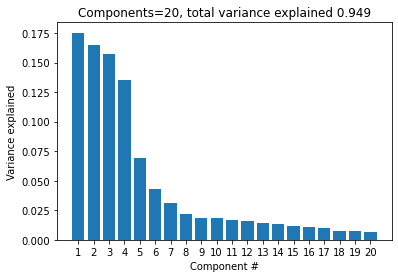

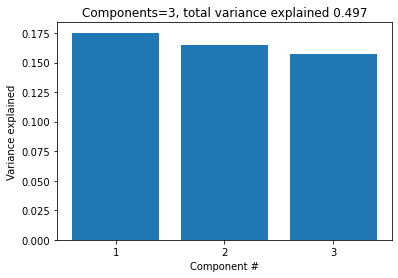

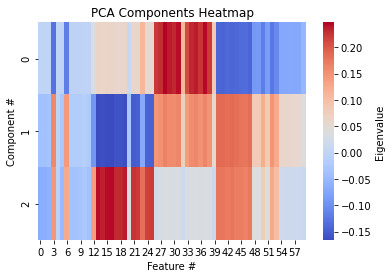

0                       Total Tackles
1                        Solo Tackles
2                    Assisted Tackles
3                               Sacks
4                             Safties
5                     Passes Defended
6                                Ints
7                           Int Yards
8                       Yards Per Int
9                  Longest Int Return
10                       Ints for TDs
11                     Forced Fumbles
12                      Kicks Blocked
13                    Longest FG Made
14                      FGs Attempted
15                           FGs Made
16                      FG Percentage
17                  Extra Points Made
18             Extra Points Attempted
19    Percentage of Extra Points Made
20               Extra Points Blocked
21                           Kickoffs
22                  Yards Per Kickoff
23                         Touchbacks
24                  Kickoffs Returned
25             Average Returned Yards
26          

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure()
ax = fig.add_subplot()
pca20Ratio = PCA(n_components=20).fit(dfx_scaled).explained_variance_ratio_
ax.bar([str(n+1) for n in range(20)],pca20Ratio)
ax.set_title('Components=20, total variance explained ' + str(round(pca20Ratio.sum(),3)))
ax.set_xlabel("Component #")
ax.set_ylabel("Variance explained")

fig = plt.figure()
ax = fig.add_subplot()
print()
ax.bar([str(n+1) for n in range(3)],pcaVariance)
ax.set_title('Components=3, total variance explained ' + str(round(pcaVariance.sum(),3)))
ax.set_xlabel("Component #")
ax.set_ylabel("Variance explained")

plt.figure()
hmap = sns.heatmap(pca.components_, cmap="coolwarm")
hmap.set_xticklabels(hmap.get_xticklabels())
hmap.set_title("PCA Components Heatmap")
hmap.set_ylabel("Component #")
hmap.set_xlabel("Feature #")
hmap.collections[0].colorbar.set_label("Eigenvalue")
plt.show()

pd.Series(dfx.columns)



### Fit 2 models to data, Agglomerative Clustering and Gaussian Mixture

In [7]:
classifying = [['Gaussian Mixture',GaussianMixture(n_components=6, random_state=0, covariance_type='tied')]]

clustering = []
clustering.append(['KMeans',KMeans(n_clusters=6, random_state=0)])
clustering.append(['Agglomerative Clustering',AgglomerativeClustering(n_clusters=6)])
clustering.append(['Birch',Birch(n_clusters=6, threshold=3.35)])

for model in clustering:
    model[1].fit(dfx_pca)
for model in classifying:
    model[1] = model[1].fit_predict(dfx_pca)

### Use adjusted Rand Index to score models compared to true labels

In [8]:
for model in clustering:
    score = adjusted_rand_score(dfy, model[1].labels_)
    model.append(score)
    print(model[0], score)
for model in classifying:
    score = adjusted_rand_score(dfy, model[1])
    model.append(score)
    print(model[0], score)

KMeans 0.23000821470565888
Agglomerative Clustering 0.32043934844012767
Birch 0.11677308433347174
Gaussian Mixture 0.2070412540755018


---

In [9]:
def graphScatter(model, clustering=True):
    if (clustering):
        labels = model[1].labels_
    else:
        labels = model[1]
    predLabelCounts = Counter(labels).most_common(6)

    predToTrueDict = {}
    for i,label in enumerate(predLabelCounts):
        predToTrueDict[label[0]] = trueLabelCounts[i][0]

    transformedLabels = [predToTrueDict[label] for label in labels]

    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')

    ax.scatter(pcaX, pcaY, pcaZ, c=transformedLabels, alpha=0.15, cmap='tab10')
    ax.set_title(f'{model[0]}, score: {round(model[2],3)}')
    ax.set_xlabel("Component #1")
    ax.set_ylabel("Component #2")
    ax.set_zlabel("Component #3")
    
    legend = plt.legend(handles=scatter.legend_elements()[0], labels=positions)
    for lh in legend.legendHandles:
        lh._legmarker.set_alpha(1)

### Graph true labels and model labels on 3D scatter plots

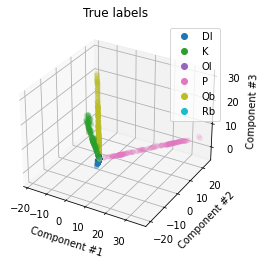

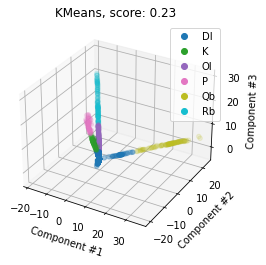

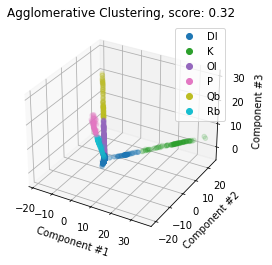

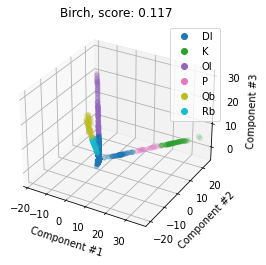

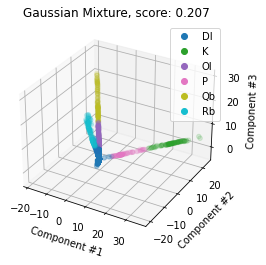

In [10]:
import matplotlib.pyplot as plt
from collections import Counter

dfy_num = [positions.index(position) for position in dfy]
trueLabelCounts = Counter(dfy_num).most_common(6)


fig = plt.figure()
ax = fig.add_subplot(projection='3d')

pcaX = dfx_pca.T[0]
pcaY = dfx_pca.T[1]
pcaZ = dfx_pca.T[2]
scatter = ax.scatter(pcaX, pcaY, pcaZ, c=dfy_num, label=positionDfs[0]['Player Id'][:9443], alpha=0.15, cmap='tab10')

# step = 500
# for x,y,z,name in zip(pcaX[::step],pcaY[::step],pcaZ[::step],df['Name'].values[::step]):
#     ax.text(x,y,z,name, size=5, ha='right')

legend = plt.legend(handles=scatter.legend_elements()[0], labels=positions)
for lh in legend.legendHandles:
    lh._legmarker.set_alpha(1)

ax.set_title("True labels")
ax.set_xlabel("Component #1")
ax.set_ylabel("Component #2")
ax.set_zlabel("Component #3")


for model in clustering:
    graphScatter(model)
graphScatter(classifying[0], False)

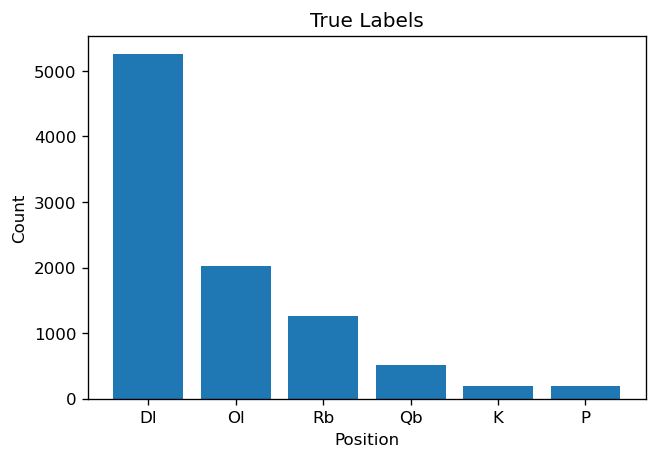

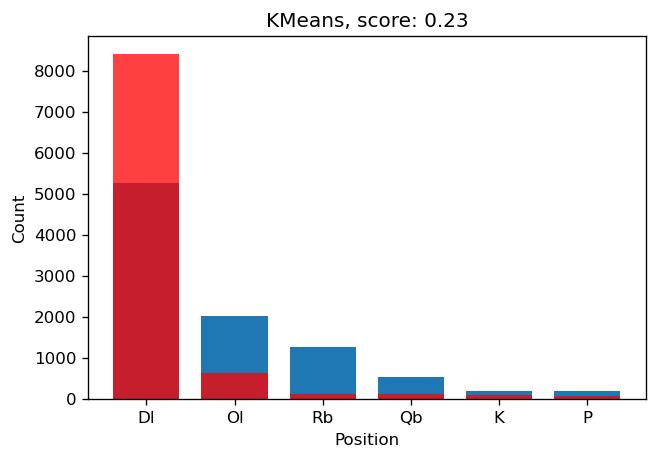

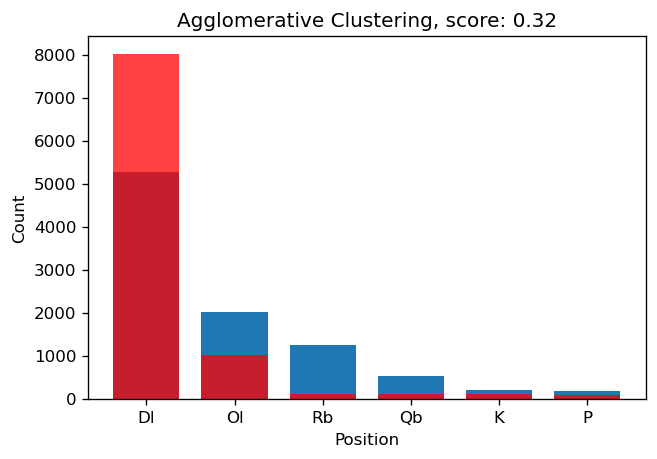

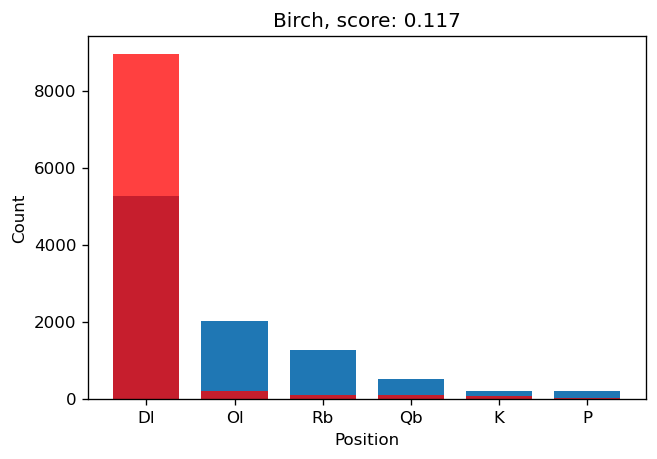

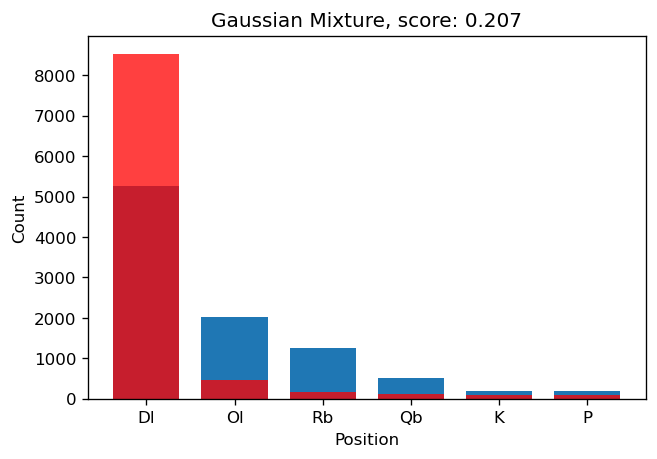

In [11]:
dfy_counts = Counter(dfy.values)

clustering_counts = []
classifying_counts = []
for model in clustering:
    clustering_counts.append(Counter(map(str,model[1].labels_.tolist())))
for model in classifying:
    classifying_counts.append(Counter(map(str,model[1].tolist())))

fig,ax=plt.subplots(dpi=120)
plt.bar(*zip(*(dfy_counts.most_common(6))))
ax.set_title("True Labels")
ax.set_xlabel("Position")
ax.set_ylabel("Count")

for i,count in enumerate(clustering_counts):
    fig,ax=plt.subplots(dpi=120)
    x = [val[0] for val in dfy_counts.most_common(6)]
    y = [val[1] for val in count.most_common(6)]
    y2 = [val[1] for val in dfy_counts.most_common(6)]
    model = ax.bar(x, y, 0.75, color='red', alpha=0.75, zorder=1)
    true = ax.bar(x, y2, 0.75, color='C0', zorder=0)
    ax.set_title(f'{clustering[i][0]}, score: {round(clustering[i][2],3)}')
    ax.set_xlabel("Position")
    ax.set_ylabel("Count")

for i,count in enumerate(classifying_counts):
    fig,ax=plt.subplots(dpi=120)
    x = [val[0] for val in dfy_counts.most_common(6)]
    y = [val[1] for val in count.most_common(6)]
    y2 = [val[1] for val in dfy_counts.most_common(6)]
    model = ax.bar(x, y, 0.75, color='red', alpha=0.75, label='Prediction', zorder=1)
    true = ax.bar(x, y2, 0.75, color='C0', label='True', zorder=0)
    ax.set_title(f'{classifying[i][0]}, score: {round(classifying[i][2],3)}')
    ax.set_xlabel("Position")
    ax.set_ylabel("Count")